In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression #Para regresión lineal
from sklearn.metrics import mean_squared_error #Para calcular el error cuadrático medio
from sklearn.preprocessing import PolynomialFeatures #Para obtener términos polinomiales de variables
from sklearn.preprocessing import StandardScaler #Para estandarizar variables
from sklearn.pipeline import Pipeline #Para crear canalizaciones que incorporan varias funciones
import matplotlib.pyplot as plt #Para algunos gráficos

In [ ]:
Empleados=pd.read_csv("https://raw.githubusercontent.com/AlcidesOxa/datos/master/ejemplo.csv",sep=';',encoding="ISO-8859-1")
Empleados.head()

In [3]:
cambio={'Años estudio':'Anios_estudio', 'Estado Civil':'Estado_civil', 'Satisfacción Trabajo':'Satisfaccion_trabajo', 'Fecha contrato':'Fecha_contrato'}
Empleados.rename(columns=cambio,inplace=True)
casosborrar=[3,5,8]
Empleados=Empleados.drop(casosborrar)
varborrar=['Faltas','Permisos']
Empleados=Empleados.drop(varborrar,axis=1)
varcategoricas=['Sexo','Estado_civil','Satisfaccion_trabajo']
Empleados[varcategoricas]=Empleados[varcategoricas].fillna('Desconocido')
Empleados[varcategoricas]=Empleados[varcategoricas].astype('category')
Empleados['Fecha_contrato']=pd.to_datetime(Empleados.Fecha_contrato)
Empleados['Experiencia_lab']=Empleados.Edad-Empleados.Anios_estudio-5
Empleados['Balance']=Empleados.Ingresos-Empleados.Gastos

# Modelo de regresión lineal múltiple

El modelo clásico de regresión lineal múltiple es una técnica estadística, que permite explorar y confirmar relaciones lineales entre una variable de interés (dependiente) y un conjunto de variables explicativas (independientes), o predictoras de la variable dependiente. La relación no es completamente determinística, se admite un componente aleatorio o de perturbación, que captura la parte aleatoria de la variable dependiente, y que no es atribuible a las variables explicativas.

La especificación del modelo es
\begin{equation*}
Y_{i}=\beta _{1}+\beta _{2}X_{i2}+\beta _{3}X_{i3}+\ldots +\beta
_{k}X_{ik}+u_{i}
\end{equation*}
donde $Y_{i}$ ($i=1,2,\ldots ,n$) es la variable dependiente; $X_{i2}$, $X_{i3}$, $\ldots $, $X_{ik}$ son las variables explicativas; $\beta _{1}$, $\beta _{2}$, $\ldots $, $\beta _{k}$ son parámetros, con $\beta _{1}$ como la parte constante de $Y_{i}$ que no varía con las explictivas, también conocido como sesgo; $\beta _{2}$, $\ldots $, $\beta _{k}$ relacionan a la variable dependiente con las explicativas respectivas; y $u_{i}$ es un término de perturbación aleatoria.

El modelo en notación matricial es
\begin{eqnarray*}
Y &=&X\beta +u \\
\begin{pmatrix}
Y_{1} \\ 
Y_{2} \\ 
\vdots  \\ 
Y_{n}
\end{pmatrix}
&=&
\begin{pmatrix}
1 & X_{12} & \ldots  & X_{1k} \\ 
1 & X_{22} & \ldots  & X_{2k} \\ 
\vdots  & \vdots  & \ddots  & \vdots  \\ 
1 & X_{n2} & \ldots  & X_{nk}
\end{pmatrix}
\begin{pmatrix}
\beta _{1} \\ 
\beta _{2} \\ 
\vdots  \\ 
\beta _{k}
\end{pmatrix}
+
\begin{pmatrix}
u_{1} \\ 
u_{2} \\ 
\vdots  \\ 
u_{n}
\end{pmatrix}
\end{eqnarray*}
donde $n$ es el tamaño de la muestra, $k$ el número de variables y $n>k$. En la práctica, el vector de parámetros $β$ es desconocido. El objetivo es estimarlo a partir de una muestra aleatoria proveniente de la población objeto de estudio.

## Variables del modelo

In [4]:
# Lista de las variables del modelo (dependiente e independientes)
vars_mod = ['Ingresos', 'Edad', 'Sexo', 'Anios_estudio', 'Estado_civil']
# Lista de variables independientes categóricas
vars_cat_mod = ['Sexo', 'Estado_civil']
# Lista de variables independientes cuantitativas
vars_cuant_mod = ['Edad', 'Anios_estudio']
# Elimina los datos perdidos del conjunto de variables del modelo
# Datos es un dataframe que sólo contiene variables del modelo y sin datos perdidos
Datos = Empleados[vars_mod].dropna()
Datos.head()

,Ingresos,Edad,Sexo,Anios_estudio,Estado_civil
0,3662.0,53.0,Hombre,5.0,Divorciado(a)
2,4063.0,39.0,Hombre,7.0,Casado(a)
4,15479.0,55.0,Hombre,20.0,Divorciado(a)
6,7553.0,30.0,Mujer,18.0,Soltero(a)
7,11612.0,33.0,Mujer,23.0,Casado(a)


## Análisis gráfico

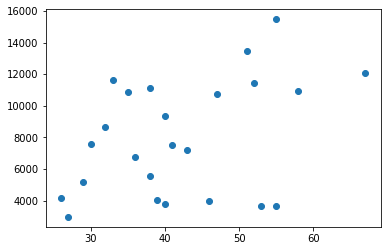

In [ ]:
plt.scatter(Datos.Edad, Datos.Ingresos)

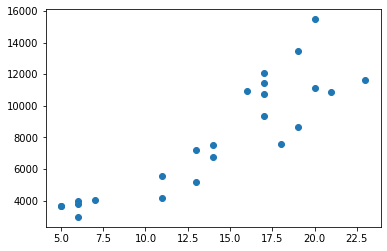

In [ ]:
plt.scatter(Datos.Anios_estudio, Datos.Ingresos)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2b61123c8>,
      dtype=object)

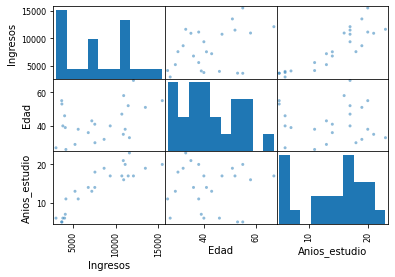

In [ ]:
pd.plotting.scatter_matrix(Datos)

## Estimación por MCO

La contraparte muestral de $Y=X\beta +u$ con un estimador $\widehat{\beta }$ a determinar es
\begin{eqnarray*}
Y=X\widehat{\beta }+\widehat{u}
\end{eqnarray*}
y dado que tampoco se conoce $u$ se reemplaza por $\widehat{u}$. Aplicando la técnica de mínimos cuadrados ordinarios (MCO) se obtiene derivando parcialmente la suma de cuadrados $\widehat{u}^{\prime }\widehat{u}$ con respecto a los elementos del vector $\widehat{\beta }$ e igualando a $0$ (vector de ceros) para optimizar
\begin{eqnarray*}
\frac{\partial \widehat{u}^{\prime }\widehat{u}}{\partial \widehat{\beta }}=
\frac{\partial }{\partial \widehat{\beta }}\left( Y-X\widehat{\beta }\right)
^{\prime }\left( Y-X\widehat{\beta }\right) =-2X^{\prime }\left( Y-X\widehat{
\beta }\right) =0
\end{eqnarray*}
resolviendo ésta ecuación para $\widehat{\beta }$ se tiene el
estimador por MCO
\begin{eqnarray*}
\widehat{\beta }=\left( X^{\prime }X\right) ^{-1}X^{\prime }Y
\end{eqnarray*}

In [5]:
# Obtiene la matriz X de variables cuantitativas independientes
X = Datos[vars_cuant_mod]
# Obtiene el vector Y, de la variable dependiente
Y = Datos.Ingresos
# Crea la instancia reg de Regresión Lineal
reg = LinearRegression()
# Ajusta el modelo lineal en modelo1
modelo1 = reg.fit(X,Y)
# Imprime los coeficientes beta y el intercepto beta1
print(modelo1.coef_, ' ', modelo1.intercept_)

[137.09427271 575.44298252]   -5814.529535375509


## Bondad de ajuste

El ajuste del modelo a los datos se mide por el coeficiente de determinación
\begin{equation*}
R^{2}=1-\frac{\sum_{i=1}^{n}\widehat{u}_{i}^{2}}{\sum_{i=1}^{n}\left( Y_{i}-\overline{Y}\right) ^{2}}
\end{equation*}
donde $\overline{Y}=\frac{1}{n}\sum_{i=1}^{n}Y_{i}$ es la media de la variable dependiente. Este coeficiente varía entre 0 y 1, si tiende a 0 entonces el modelo no se ajusta bien a los datos, por el contrario si se acerca a 1 entonces el ajuste es bueno. No obstante el $R^{2}$ no es un indicador adecuado sobre el ajuste del modelo fuera de la muestra de estimación, dado que es una función creciente de la cantidad de variables
explicativas, y puede aumentar aún con variables predictoras superfluas.
Como alternativa se propone el $R^{2}$ ajustado
\begin{equation*}
\overline{R}^{2}=1-\frac{n-1}{n-k}\left( 1-R^{2}\right) 
\end{equation*}
cuya interpretación es similar al del $R^{2}$, pero lo bueno es que las variables explicativas innecesarias no tienden a incrementarlo.

In [ ]:
# Calcula el R2 o coeficiente de determinación del modelo1
R2 = modelo1.score(X,Y) # evaluación dentro de la muestra
# Para calcular el R2 ajustado, primero obtenemos la dimensión de X
n, k = np.shape(X)
k = k + 1 #aumento en 1 a k por la constante
R2a = 1 - (n-1)/(n-k)*(1-R2) #aplica la fórmula del R2 ajustado
print(R2,' ',R2a)

## Predicción

La predicción de los valores de la media condicional de la variable dependiente es $\widehat{Y}=X\widehat{\beta }$. Para medir la incertidumbre de éstas predicciones se tiene la matriz de covarianzas de $\widehat{Y}$, y su estimación es
\begin{equation*}
\widehat{\Sigma }_{\widehat{y}}=\widehat{\sigma }^{2}X\left( X^{\prime
}X\right) ^{-1}X^{\prime }
\end{equation*}
Para evaluar las predicciones se aplica el error cuadrático medio (MSE por sus siglas en inglés) el cual es, en general, para cualquier estimación o predicción $\widehat{\theta }$
\begin{equation*}
MSE\left( \widehat{\theta }\right) =E\left[ \left( \widehat{\theta }-\theta \right) ^{2}\right]
\end{equation*}
Para las predicciones del modelo de regresión lineal, el MSE es
\begin{equation*}
MSE\left( \widehat{Y}\right)=\frac{\sum_{i=1}^{n}\left( Y_i-\widehat{Y_i} \right) ^{2}}{n}=\frac{\sum_{i=1}^{n}\widehat{u}_{i}^{2}}{n}
\end{equation*}
Mayores valores del MSE indican que los errores son grandes en la predicción, por el contrario, valores bajos indican una mejor predicción. En muchos casos se utiliza la raíz cuadrada del MSE para evaluar las predicciones, y entonces se habla del RMSE.

In [ ]:
# Predice mediante el modelo de regresión lineal los valores de Y
Yp = modelo1.predict(X)
# Calcula y muestra el error cuadrático medio
print('MSE', mean_squared_error(Y, Yp))

# Regresión polinómica y Pipelines

## Términos polinomiales

In [ ]:
# Matriz W
W = [[3, 2], [5, 8]]
# Obtiene los términos polinomiales de grado 2 de W
PolynomialFeatures(2).fit_transform(W)

array([[ 1.,  3.,  2.,  9.,  6.,  4.],
       [ 1.,  5.,  8., 25., 40., 64.]])

In [ ]:
PolynomialFeatures(2).fit_transform(X)

## Pipelines

In [ ]:
pipe1 = Pipeline([
                  ('estand', StandardScaler()), #estandariza con media 0 y varianza 1
                  ('polin', PolynomialFeatures()), #obtiene términos polinomiales de grado 2
                  ('reglin', LinearRegression()) #regresión lineal
])
pipe1.fit(X, Y) #ajuste el pipeline
pipe1.predict(X) #predice Y

array([ 3429.20494633,  4324.19249352, 14783.48734706,  7493.848254  ,
       11911.56138128,  3659.56356705,  7663.43949485, 12569.3748754 ,
        5695.39274209, 11126.7056205 ,  4144.22327402,  9412.95235808,
        6797.90892594,  4080.23832127, 11117.23446206,  4910.8379713 ,
       11447.45072514, 11014.50247972,  3074.84844042, 10722.56272232,
       13138.01474519,  7350.9582858 ,  8695.08008843,  3263.41647823])

# Regresión con variables explicativas cualitativas

## Obtención de las variables dicotómicas

In [13]:
# Crea un dataframe de variables dicotómicas denominado Dicos, y elimina la primera
# categoría de cada variable categórica
Dicos = pd.get_dummies(Datos[vars_cat_mod], drop_first = True)
# Concatena los dataframes Dicos y Datos (solo variables cuantitativas independientes)
X = pd.concat([Dicos, Datos[vars_cuant_mod]], axis=1) #axis=1 es por columnas
Y = Datos.Ingresos
X.head()

,Sexo_Mujer,Estado_civil_Desconocido,Estado_civil_Divorciado(a),Estado_civil_Soltero(a),Estado_civil_Viudo(a),Edad,Anios_estudio
0,0,0,1,0,0,53.0,5.0
2,0,0,0,0,0,39.0,7.0
4,0,0,1,0,0,55.0,20.0
6,1,0,0,1,0,30.0,18.0
7,1,0,0,0,0,33.0,23.0


## Ajuste lineal y predicción

In [14]:
reg = LinearRegression()
modelo1 = reg.fit(X,Y)
Yp = modelo1.predict(X)
print('MSE', mean_squared_error(Y,Yp), '-- Score', modelo1.score(X,Y))

MSE 438657.26207742933 -- Score 0.9658153871862107


Este modelo predice mejor que el anterior (dentro de la muestra)

# Regresión con variables dicotómicas y polinomiales

## Regresiones polinómicas

In [15]:
for i in range(1,4):
  X = PolynomialFeatures(i).fit_transform(Datos[vars_cuant_mod]) #var cuant de grado i
  X = pd.DataFrame(X, index = Dicos.index.values) #Transforma a X en un dataframe de pandas con index igual al de Dicos
  X = pd.concat([Dicos, X], axis=1) #concatena por columnas Dicos y X
  m1 = reg.fit(X, Y) #ajuste lineal en m1
  Yp = m1.predict(X) #predicción
  print(mean_squared_error(Y, Yp)) #imprime el MSE para cada i

438657.26207742916
38507.354752062434
338.0665471017776


## Regresiones polinómicas y evaluación fuera de la muestra

In [26]:
#construye un dataframe de un sólo empleado
DatosPrb = pd.DataFrame([[6240, 43, 'Hombre', 11, 'Casado(a)']], columns = vars_mod)
#construye un dataframe con datos de entrenamiento y de prueba, keys son las claves de esos datos
#concatena por filas (axis=0 o nada)
Datos_EP = pd.concat([Datos, DatosPrb], keys = ['Entr', 'Prb'])
#crea dicotómicas de las variables categóricas del dataframe Datos_EP
Dicos_EP = pd.get_dummies(Datos_EP[vars_cat_mod], drop_first = True)
#Selecciona la variable dependiente para entrenamiento
Y_e = Datos_EP.Ingresos.loc['Entr',:]
#Selecciona la variable dependiente para prueba
Y_p = Datos_EP.Ingresos.loc['Prb',:]
for i in range(1,4):
  X = PolynomialFeatures(i).fit_transform(Datos_EP[vars_cuant_mod]) #obtiene los términos polinomiales de las variables cuantitativas del dataframe Datos_EP
  X = pd.DataFrame(X, index = Dicos_EP.index.values) #convierte X en un dataframe
  X = pd.concat([Dicos_EP, X], axis=1) #concatena por columnas a X y Dicos
  X_e = X.loc['Entr',:] #Selecciona la variables independientes para entrenamiento
  X_p = X.loc['Prb',:] #Selecciona la variables independientes para prueba
  m1 = reg.fit(X_e, Y_e) #Ajusta la regresión con los datos de entrenamiento
  Yp = m1.predict(X_p) #Predice con los datos de prueba
  print(mean_squared_error(Y_p, Yp)) #Obtiene el error cuadrático medio de la predicción de prueba

66443.02662338525
16324.601317562017
48740.109556919255
